## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [51]:
from sklearn import datasets, metrics, linear_model
# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [52]:
# 讀取wine資料集
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=4)

# 建立一個分類與回歸樹模型
DTC = DecisionTreeClassifier()

# 將訓練資料丟進去模型訓練
DTC.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
DTC_y_pred = DTC.predict(x_test)

In [53]:
#正確率
acc = metrics.accuracy_score(y_test, DTC_y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9166666666666666


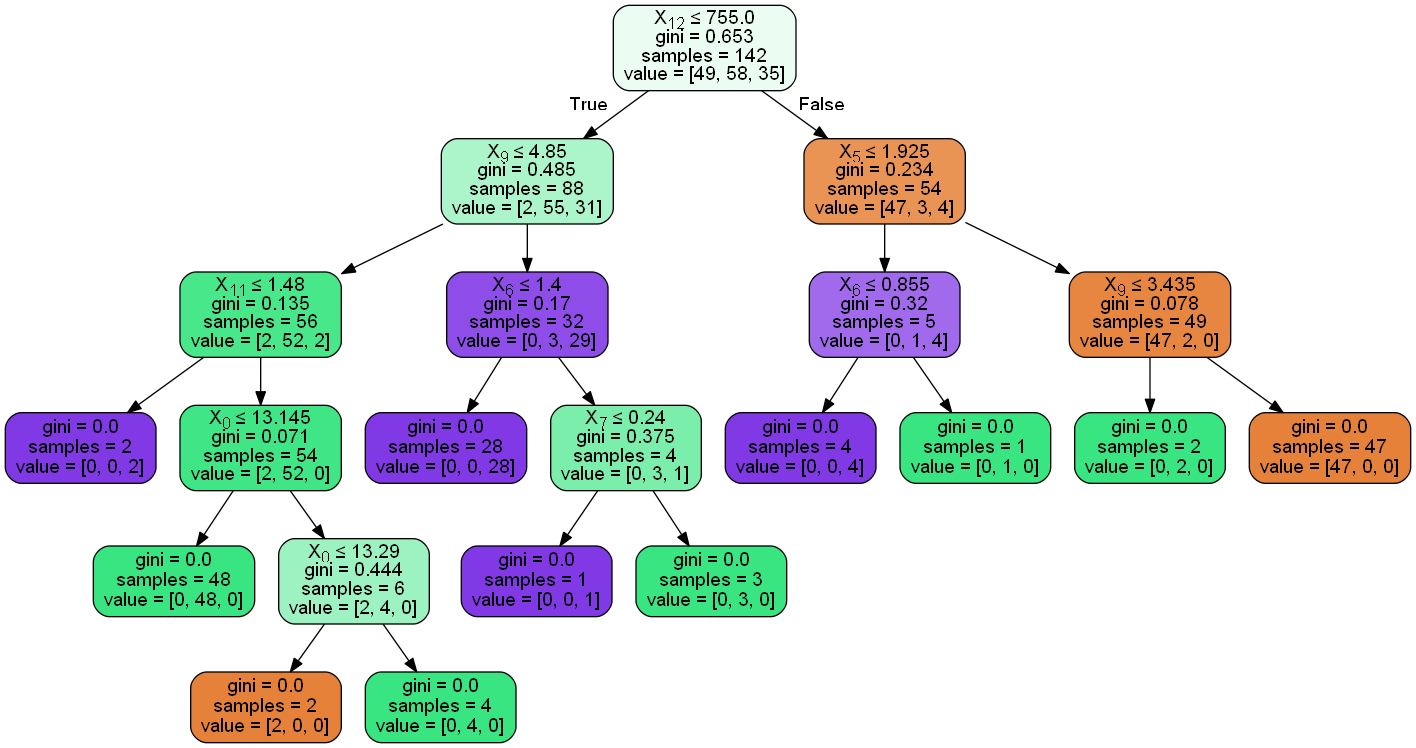

In [54]:
dot_data = StringIO()
export_graphviz(DTC, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [55]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [56]:
#特徵重要性
DTC.feature_importances_

array([0.04151837, 0.        , 0.        , 0.        , 0.        ,
       0.07753082, 0.05968764, 0.01616821, 0.        , 0.36094879,
       0.        , 0.0400926 , 0.40405357])

In [57]:
#調整參數，使用entropy可讓測試集正確率達到100%
# 建立一個分類與回歸樹模型
DTC = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=None,min_samples_split=7,min_samples_leaf=5)

# 將訓練資料丟進去模型訓練
DTC.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
DTC_y_pred = DTC.predict(x_test)

#正確率
acc = metrics.accuracy_score(y_test, DTC_y_pred)
print("Acuuracy: ", acc)

Acuuracy:  1.0


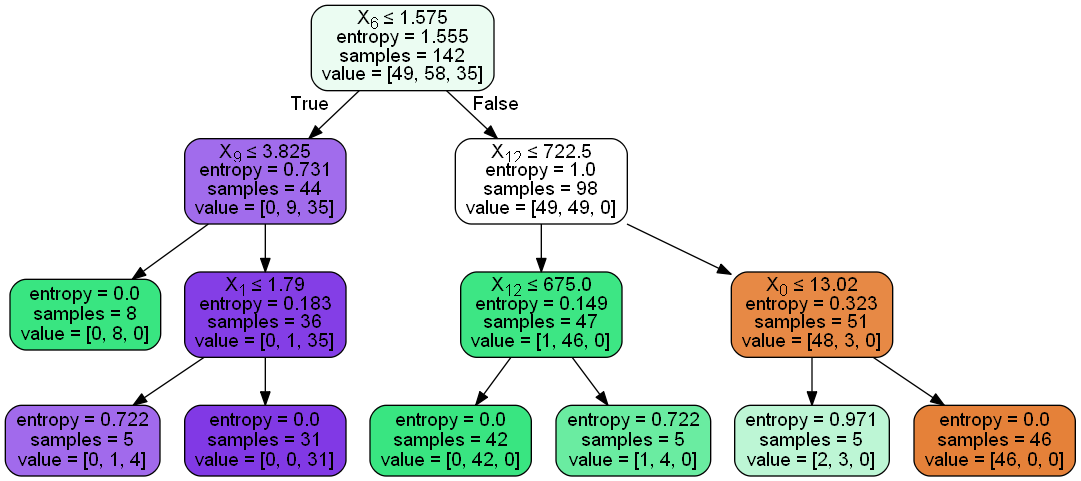

In [58]:
dot_data = StringIO()
export_graphviz(DTC, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [60]:
# 讀取波士頓房價資料集
bostonHousePrice = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(bostonHousePrice.data, bostonHousePrice.target, test_size=0.2, random_state=4)

# 建立一個分類與回歸樹模型
DTR = DecisionTreeRegressor()

# 將訓練資料丟進去模型訓練
DTR.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
DTR_y_pred = DTR.predict(x_test)

In [61]:
print(bostonHousePrice.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [62]:
#特徵重要性
DTR.feature_importances_

array([5.95685121e-02, 1.17960154e-03, 5.29460893e-03, 2.55045457e-05,
       3.30358263e-02, 5.82012573e-01, 1.21694158e-02, 5.26313210e-02,
       7.13669506e-04, 1.80622786e-02, 1.71377102e-02, 8.07002746e-03,
       2.10098951e-01])

In [59]:
dot_data = StringIO()
export_graphviz(DTR, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [7]:
#MSE
print("DecisionTreeRegressor Mean squared error: %.2f"% metrics.mean_squared_error(y_test, DTR_y_pred))

DecisionTreeRegressor Mean squared error: 23.66


In [8]:
# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
regr_y_pred = regr.predict(x_test)

In [9]:
#波士頓房價資料，分別使用分類與迴歸樹與線性模型，其分類與迴歸樹MSE較線性模型MSE來得小
print("linearRegression Mean squared error: %.2f"% metrics.mean_squared_error(y_test, regr_y_pred))

linearRegression Mean squared error: 25.41
